**School**: Slovak University of technology in Bratislava\
**Faculty**: Faculty of Informatics and Information Technologies\
**Course**: NSIETE

**Authors**: Martin Schön and Adam Žák

*Seminar*: Wednesday 16:00\
*Seminar teacher*: Mgr. Lukáš Hudec\
*Academic year*: 2022/2023

**Dataset**: League of Legends diamond ranked games (10 mins)\
Link: https://www.kaggle.com/datasets/bobbyscience/league-of-legends-diamond-ranked-games-10-min

**Dataset description**:\
This dataset contains the first 10min. stats of approx. 10k ranked games from a high ELO (DIAMOND I to MASTER). Players have roughly the same level.

Each game is unique. The gameId can help you to fetch more attributes from the Riot API.

There are 19 features per team (38 in total) collected after 10min in-game. This includes kills, deaths, gold, experience, level…\
The last column in data is information about victory of a blue team.

The column blueWins is the target value (the value we are trying to predict). A value of 1 means the blue team has won. 0 otherwise.

In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import f_regression

In [3]:
pd.set_option('display.max_columns', 500)
DATA_PATH = '../data/high_diamond_ranked_10min.csv'
SAVE_TO = '../data/processed_high_diamond.csv'

data = pd.read_csv(DATA_PATH)

In [4]:
data.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [5]:
data.dtypes

gameId                            int64
blueWins                          int64
blueWardsPlaced                   int64
blueWardsDestroyed                int64
blueFirstBlood                    int64
blueKills                         int64
blueDeaths                        int64
blueAssists                       int64
blueEliteMonsters                 int64
blueDragons                       int64
blueHeralds                       int64
blueTowersDestroyed               int64
blueTotalGold                     int64
blueAvgLevel                    float64
blueTotalExperience               int64
blueTotalMinionsKilled            int64
blueTotalJungleMinionsKilled      int64
blueGoldDiff                      int64
blueExperienceDiff                int64
blueCSPerMin                    float64
blueGoldPerMin                  float64
redWardsPlaced                    int64
redWardsDestroyed                 int64
redFirstBlood                     int64
redKills                          int64


In [6]:
data.isna().sum()

gameId                          0
blueWins                        0
blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueEliteMonsters               0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
blueGoldDiff                    0
blueExperienceDiff              0
blueCSPerMin                    0
blueGoldPerMin                  0
redWardsPlaced                  0
redWardsDestroyed               0
redFirstBlood                   0
redKills                        0
redDeaths                       0
redAssists                      0
redEliteMonsters                0
redDragons                      0
redHeralds    

In [7]:
data.describe()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9.879000e+03,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,4.500084e+09,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,0.187974,0.051422,16503.455512,6.916004,17928.110133,216.699565,50.509667,14.414111,-33.620306,21.669956,1650.345551,22.367952,2.723150,0.495192,6.137666,6.183925,6.662112,0.573135,0.413098,0.160036,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,2.757328e+07,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,0.390712,0.244369,1535.446636,0.305146,1200.523764,21.858437,9.898282,2453.349179,1920.370438,2.185844,153.544664,18.457427,2.138356,0.500002,2.933818,3.011028,4.060612,0.626482,0.492415,0.366658,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,4.295358e+09,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10730.000000,4.600000,10098.000000,90.000000,0.000000,-10830.000000,-9333.000000,9.000000,1073.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,4.483301e+09,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,15415.500000,6.800000,17168.000000,202.000000,44.000000,-1585.500000,-1290.500000,20.200000,1541.550000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,4.510920e+09,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,16398.000000,7.000000,17951.000000,218.000000,50.000000,14.000000,-28.000000,21.800000,1639.800000,16.000000,2.000000,0.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,4.521733e+09,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,0.000000,17459.000000,7.200000,18724.000000,232.000000,56.000000,1596.000000,1212.000000,23.200000,1745.900000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,4.527991e+09,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,1.000000,4.000000,23701.000000,8.000000,22224.000000,283.000000,92.000000,11467.000000,8348.000000,28.300000,2370.100000,276.000000,24.000000,1.000000,22.000000,22.000000,28.000000,2.000000,1.000000,1.000000,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


In [8]:
print(data.shape)

(9879, 40)


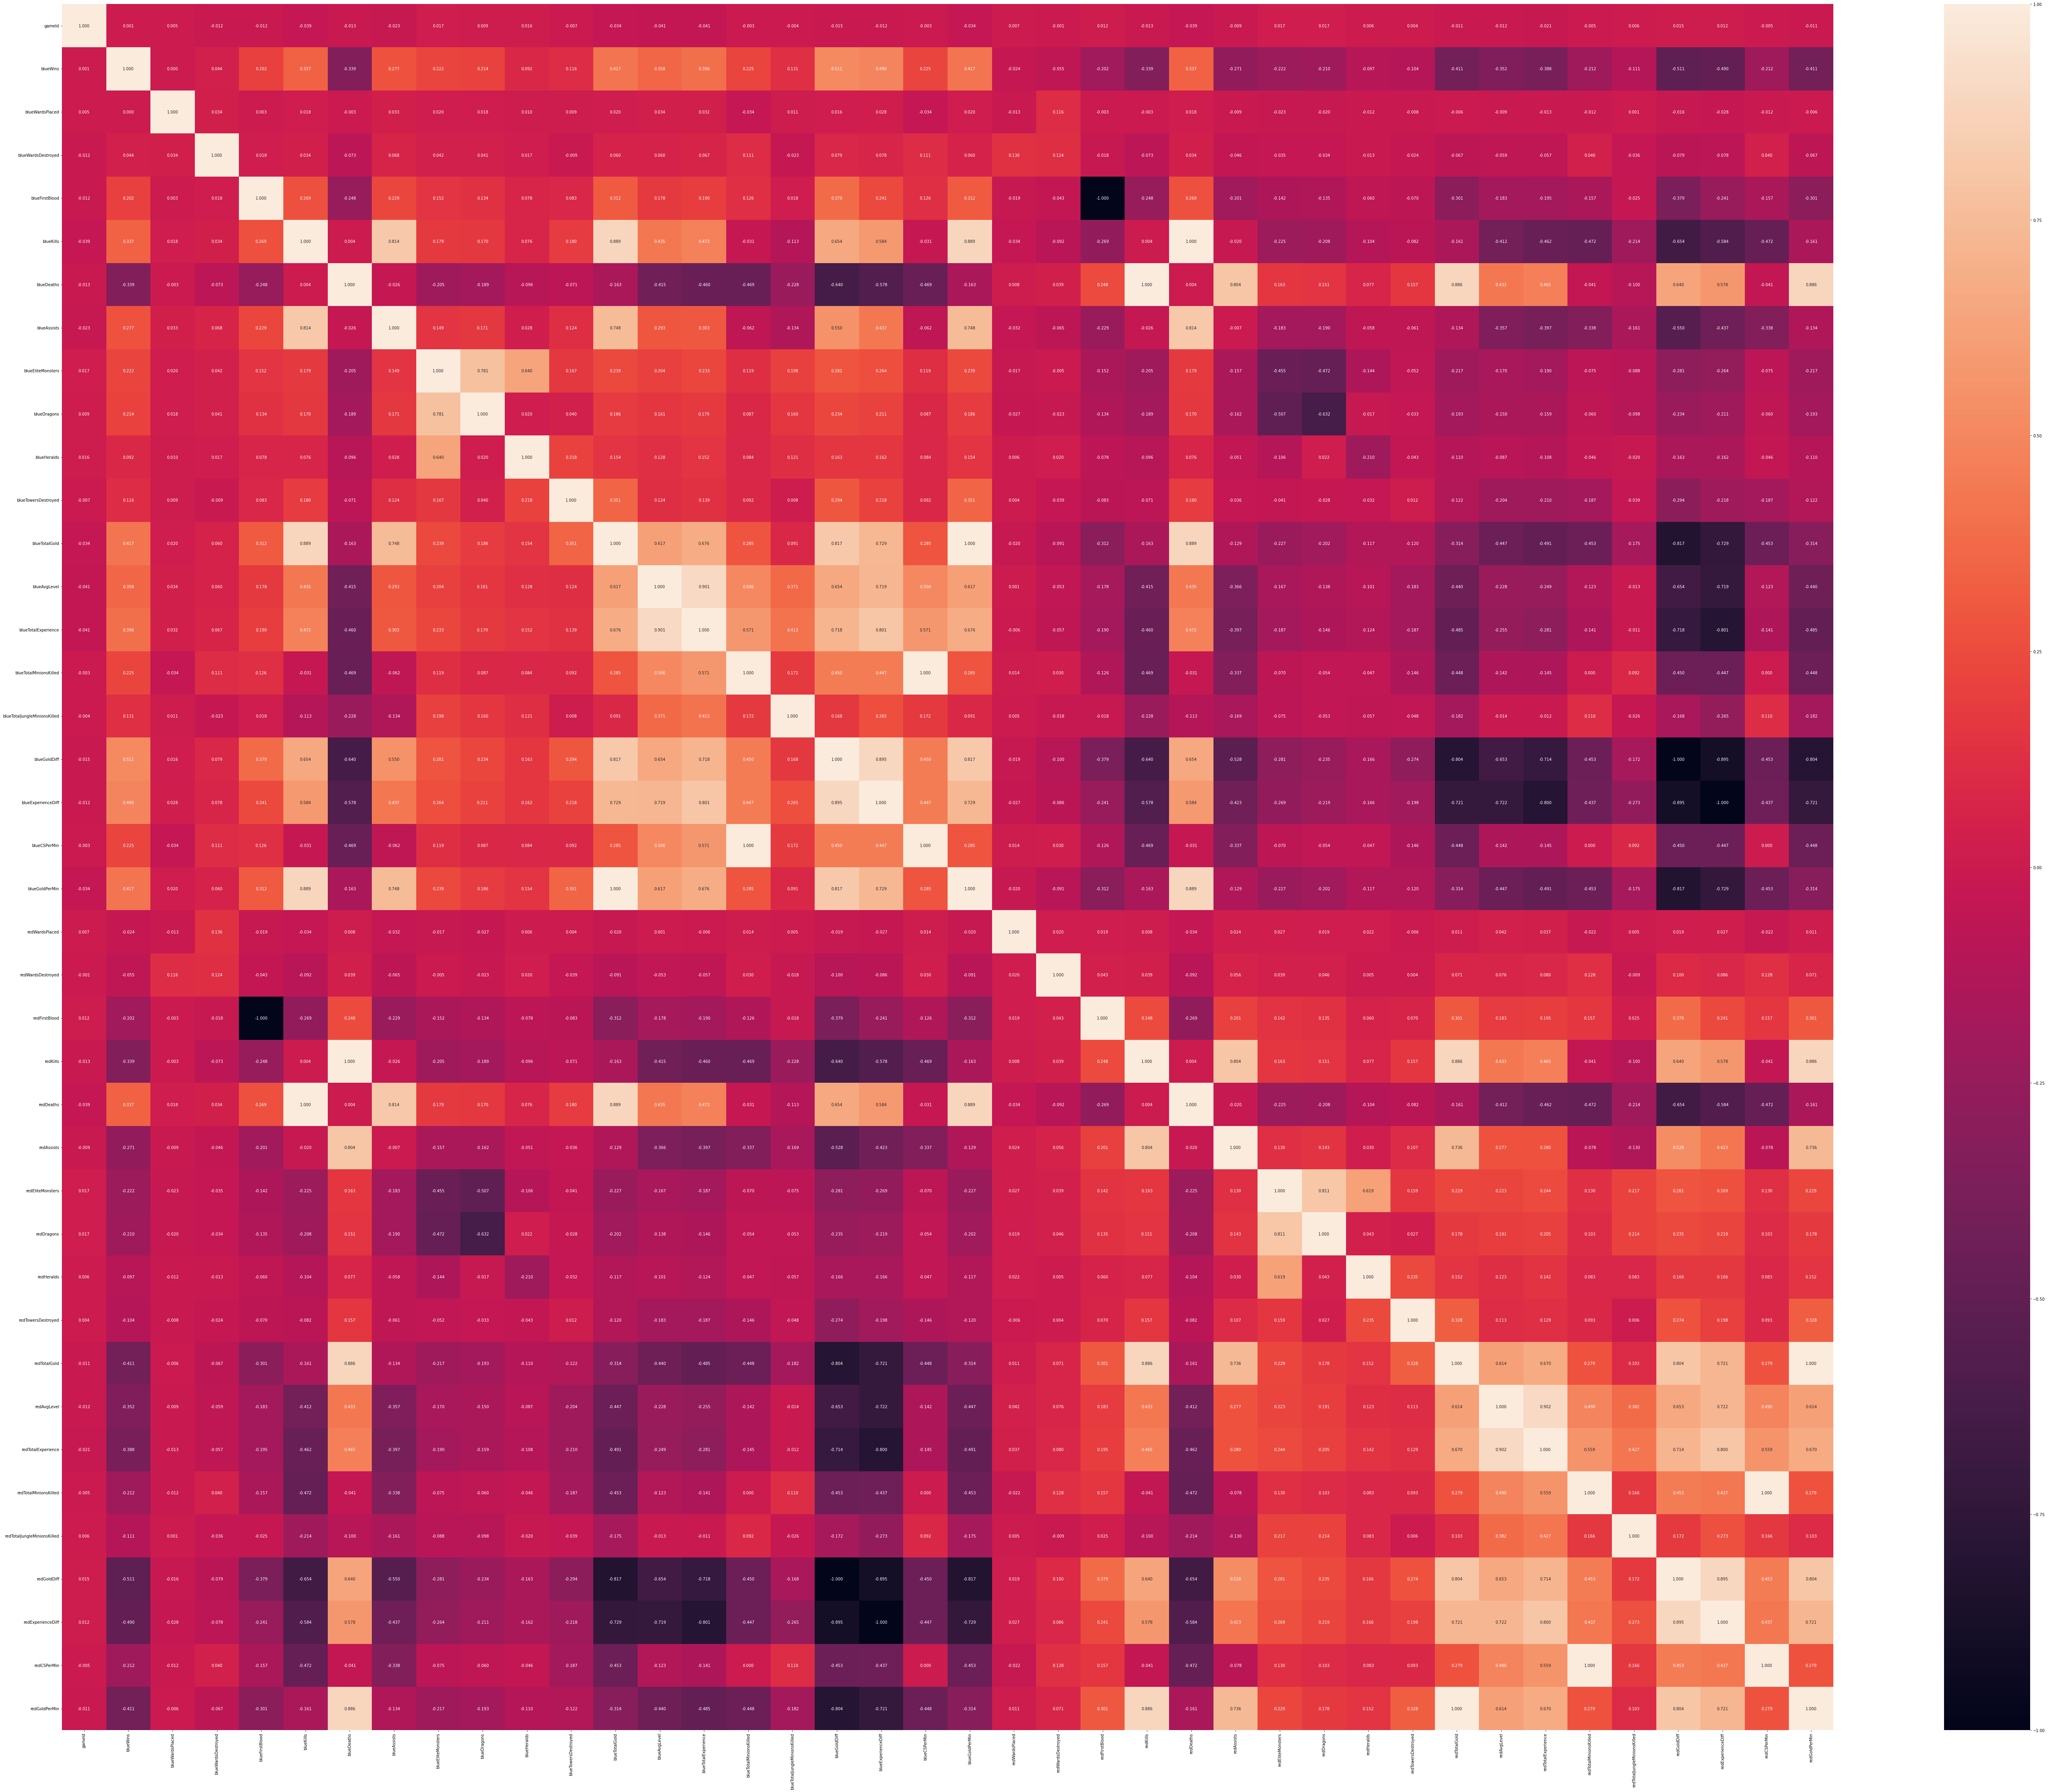

In [9]:
fig, ax = plt.subplots(figsize=(100,80))
sns.heatmap(data.corr(), ax=ax, annot=True, fmt=".3f")
plt.show()

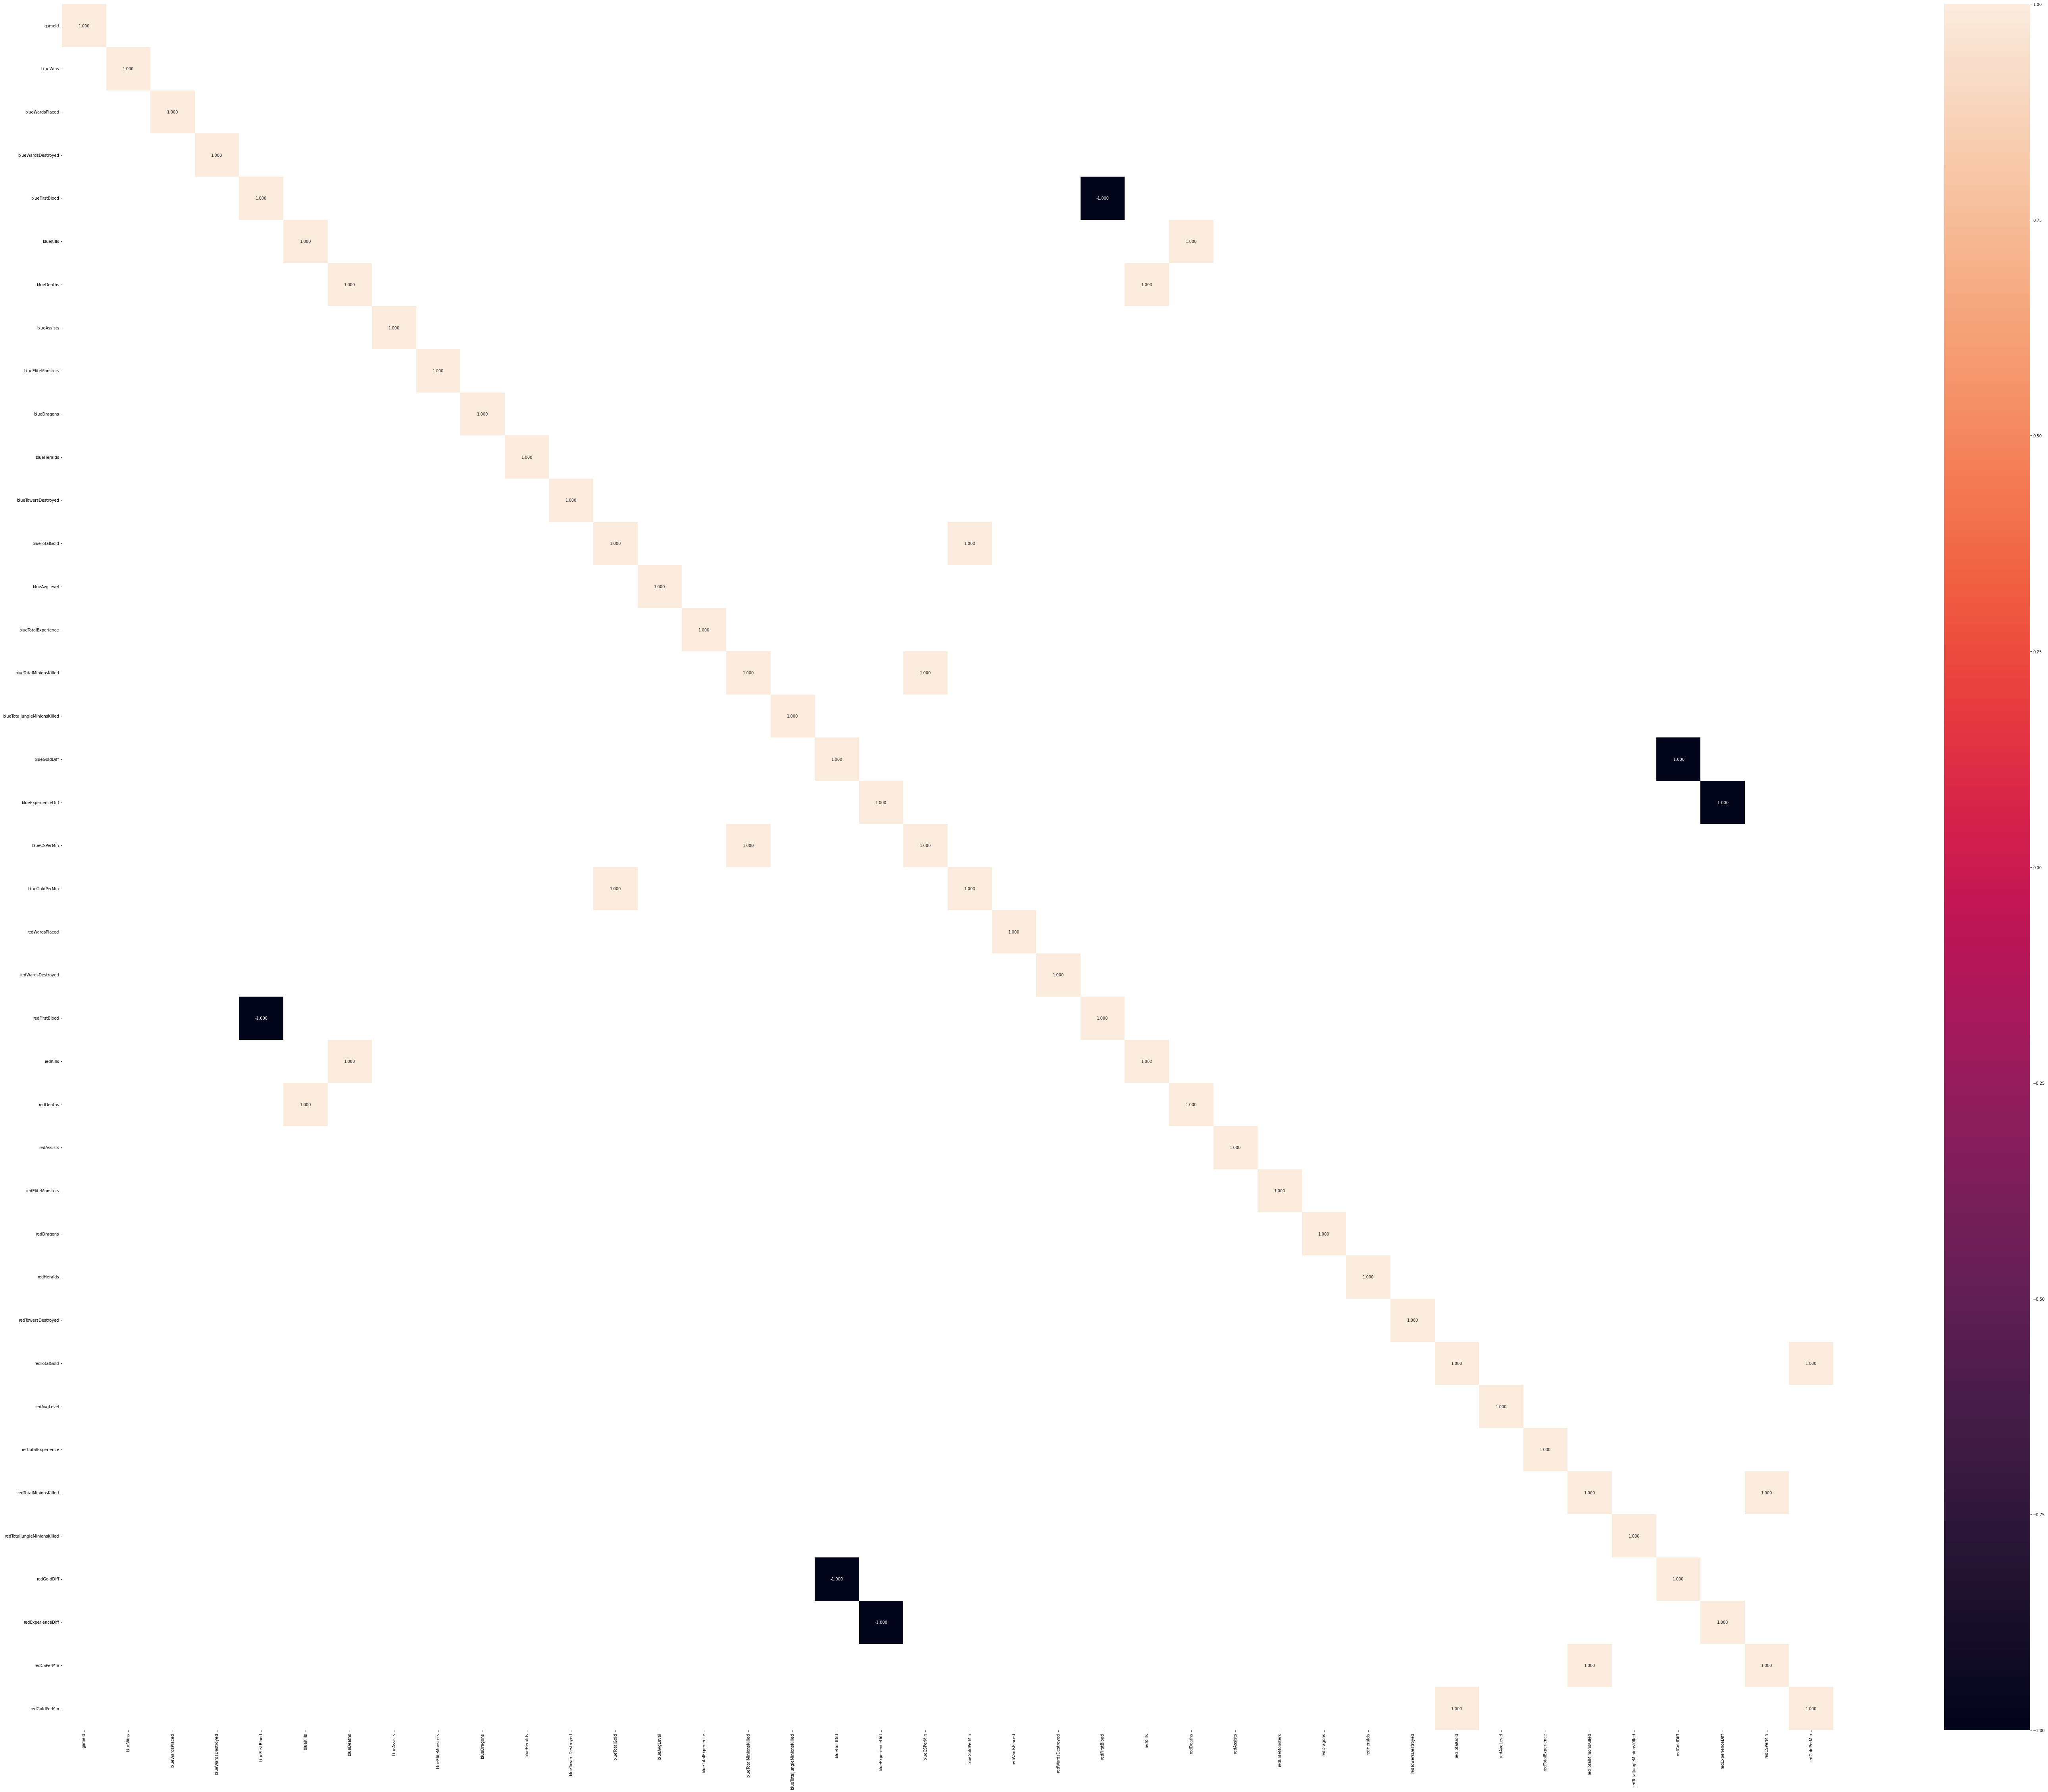

In [10]:
fig, ax = plt.subplots(figsize=(100,80))
crrs = data.corr()
sns.heatmap(crrs[abs(crrs) > 0.95], ax=ax, annot=True, fmt=".3f")
plt.show()

## Dropping columns
At first, we want to delete columns, that are not necessary. There are some columns having the same data just written in different ways - those will have correlation of 1.0 or -1.0 shown on the heatmap above.

In [11]:
data[['redCSPerMin', 'redTotalMinionsKilled', 'blueCSPerMin', 'blueTotalMinionsKilled']].head(5)

,redCSPerMin,redTotalMinionsKilled,blueCSPerMin,blueTotalMinionsKilled
0,19.7,197,19.5,195
1,24.0,240,17.4,174
2,20.3,203,18.6,186
3,23.5,235,20.1,201
4,22.5,225,21.0,210


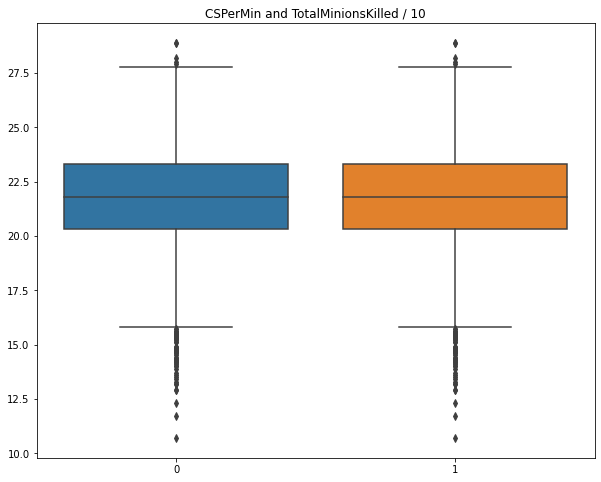

In [12]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=[data['redCSPerMin'], data['redTotalMinionsKilled'] / 10])
plt.title("CSPerMin and TotalMinionsKilled / 10")
plt.show()

redCSPerMin and blueCSPerMin (CS == creep score) are basically the columns of TotalMinionsKilled / 10 (for 10 in game minues), so those columns are not brining any new data to the dataset.

In [13]:
data.drop(columns={'redCSPerMin', 'blueCSPerMin'}, inplace=True)

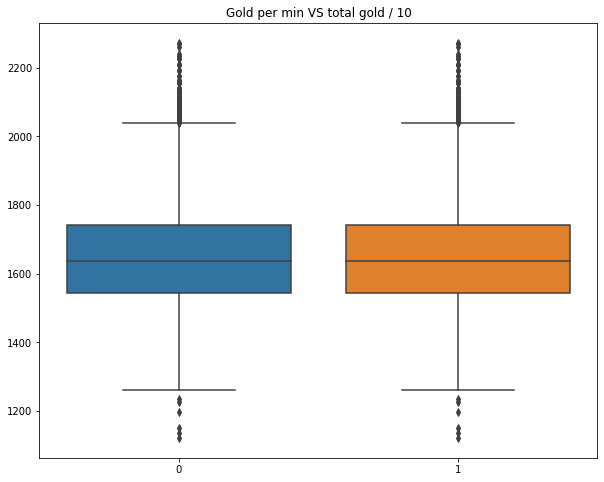

In [14]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=[data['redTotalGold'] / 10, data['redGoldPerMin']])
plt.title("Gold per min VS total gold / 10")
plt.show()

The same is true for gold values.

In [15]:
data.drop(columns={'redGoldPerMin', 'blueGoldPerMin'}, inplace=True)

### Data from one team reflected on the other team.
The target variable is "blue wins" which marks victory or loss of blue team.\
There are several columns that are reflecting the same value, but from two different viewpoints (for blue and red team differently) - we will keep blue team ones.\
For example blueKills are mapping redDeaths, so we can only keep blueKills column.

In [16]:
data[data['redKills'] != data['blueDeaths']]

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff


In [17]:
data[data['blueKills'] != data['redDeaths']]

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff


In [18]:
data[['blueFirstBlood', 'redFirstBlood']].value_counts()

blueFirstBlood  redFirstBlood
1               0                4987
0               1                4892
dtype: int64

In [19]:
data[abs(data['blueGoldDiff']) != abs(data['redGoldDiff'])]

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff


In [20]:
data[abs(data['blueExperienceDiff']) != abs(data['redExperienceDiff'])]

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff


In [21]:
data.drop(columns={'redKills', 'redDeaths', 'redFirstBlood', 'redGoldDiff', 'redExperienceDiff'}, inplace=True)

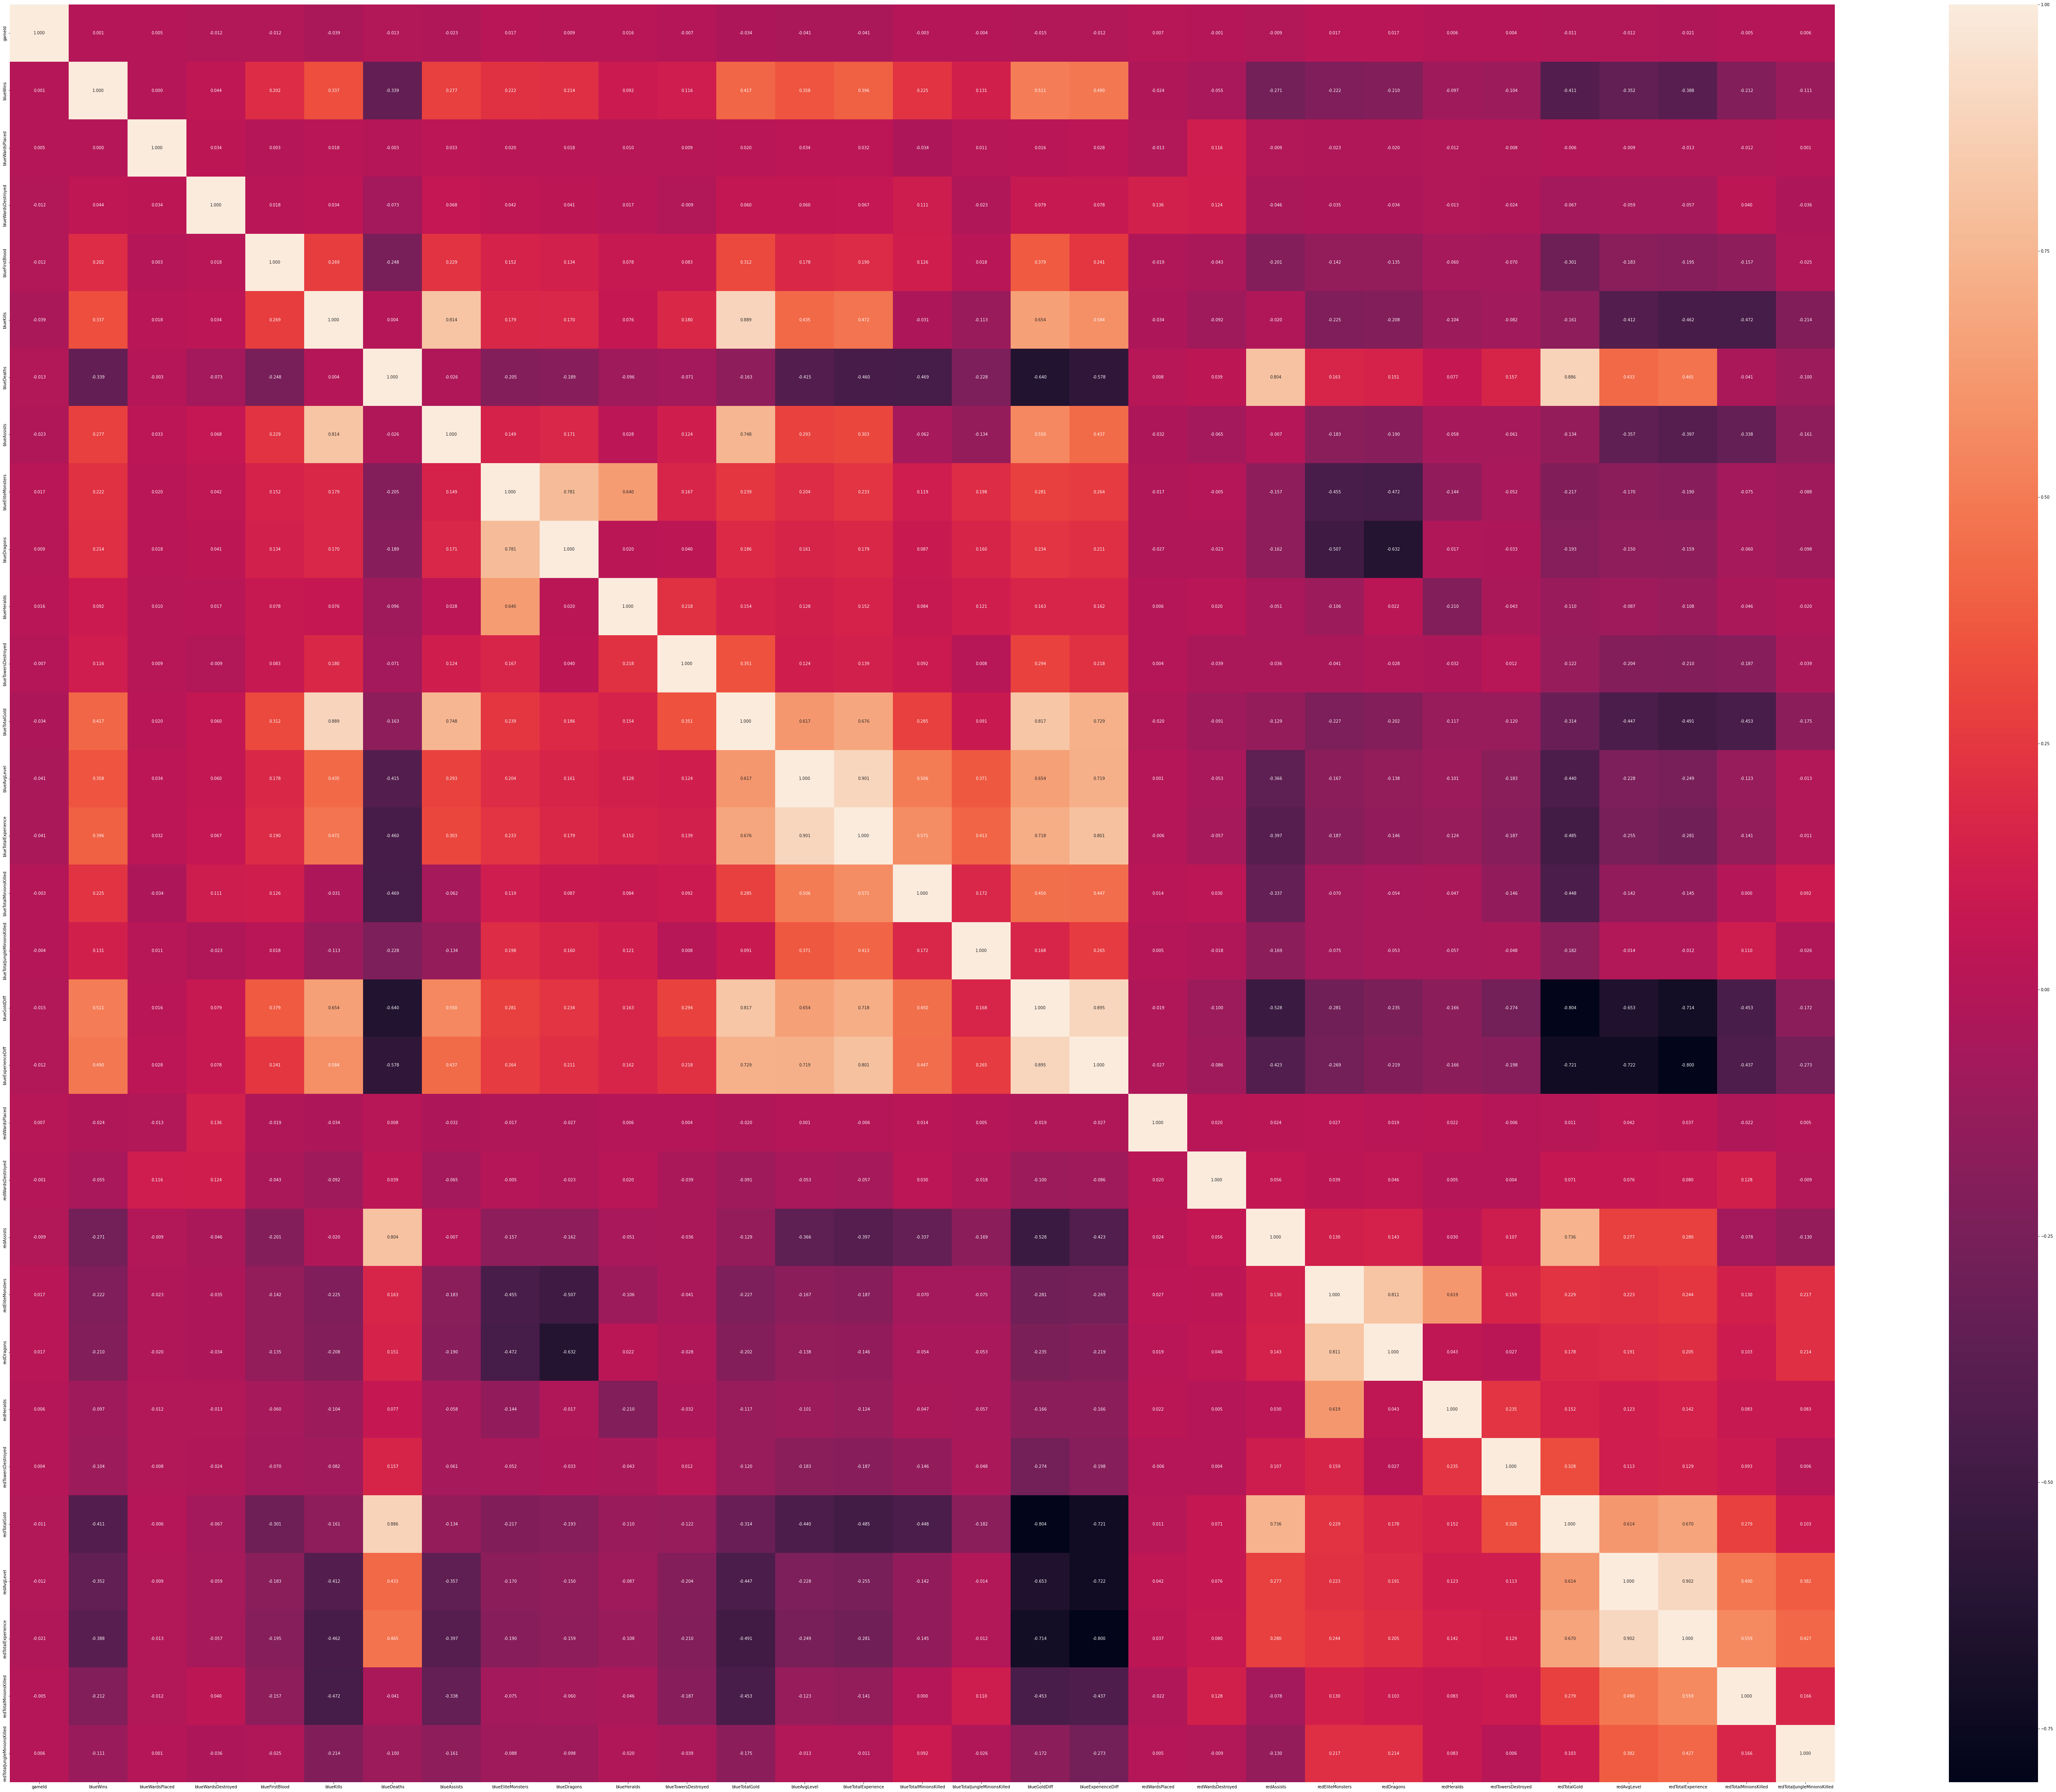

In [22]:
fig, ax = plt.subplots(figsize=(100,80))
sns.heatmap(data.corr(), ax=ax, annot=True, fmt=".3f")
plt.show()

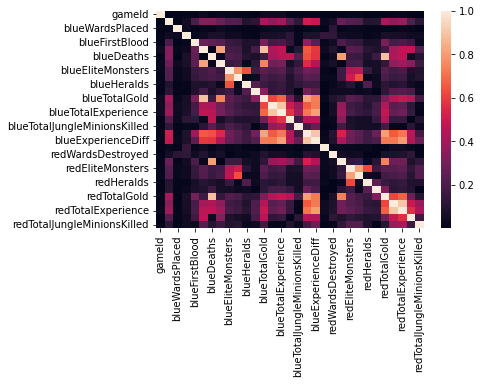

In [23]:
sns.heatmap(data.corr().abs())
plt.show()

In [24]:
print(data.columns)

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'redWardsPlaced', 'redWardsDestroyed', 'redAssists', 'redEliteMonsters',
       'redDragons', 'redHeralds', 'redTowersDestroyed', 'redTotalGold',
       'redAvgLevel', 'redTotalExperience', 'redTotalMinionsKilled',
       'redTotalJungleMinionsKilled'],
      dtype='object')


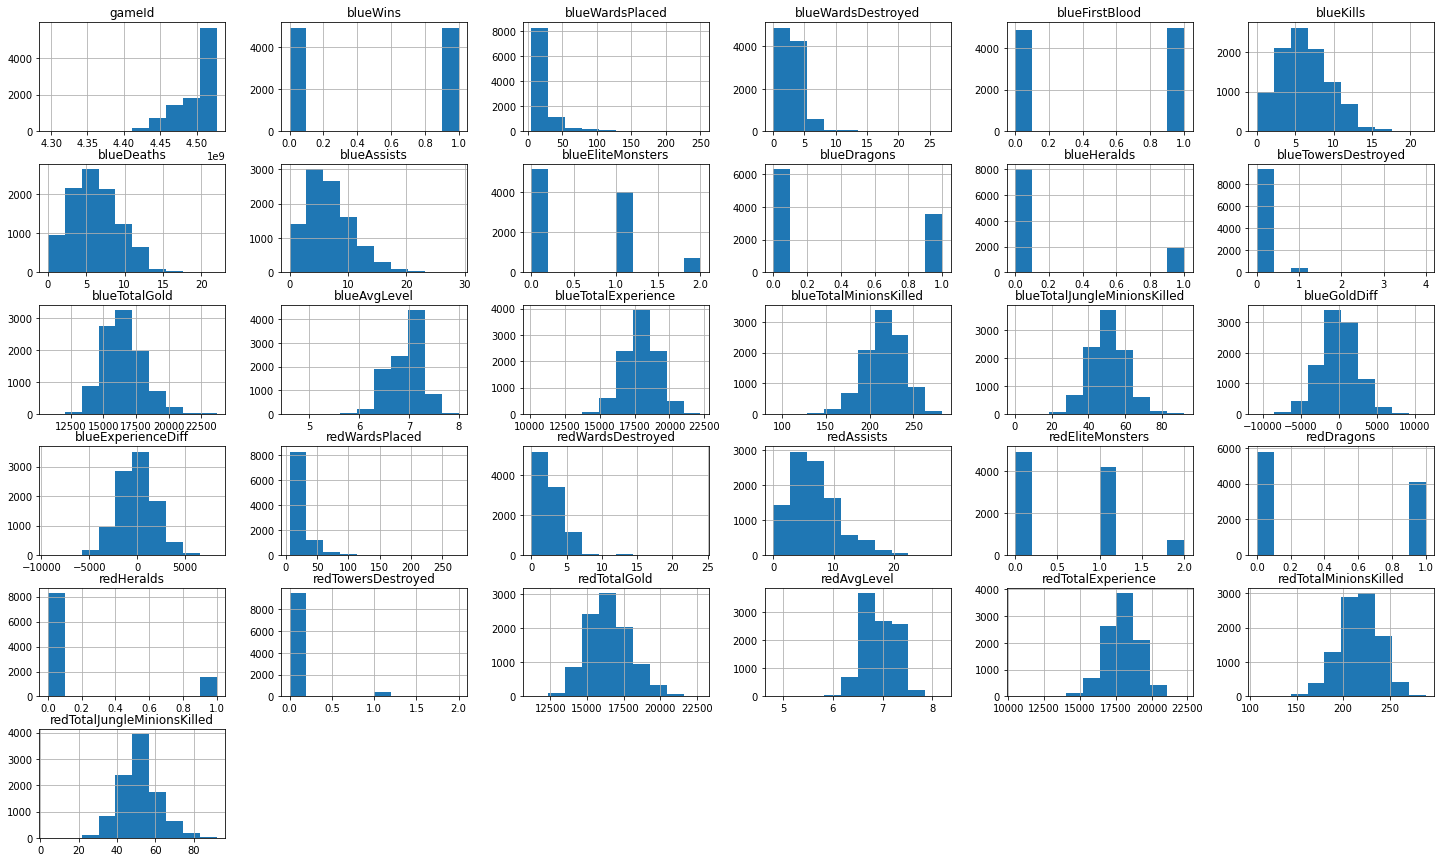

In [25]:
data.hist(figsize=(25,15))
plt.show()

In [26]:
print(data.blueWins.value_counts())

0    4949
1    4930
Name: blueWins, dtype: int64


In [27]:
blueVictories = data[data.blueWins == 1]
blueLosses = data[data.blueWins == 0]

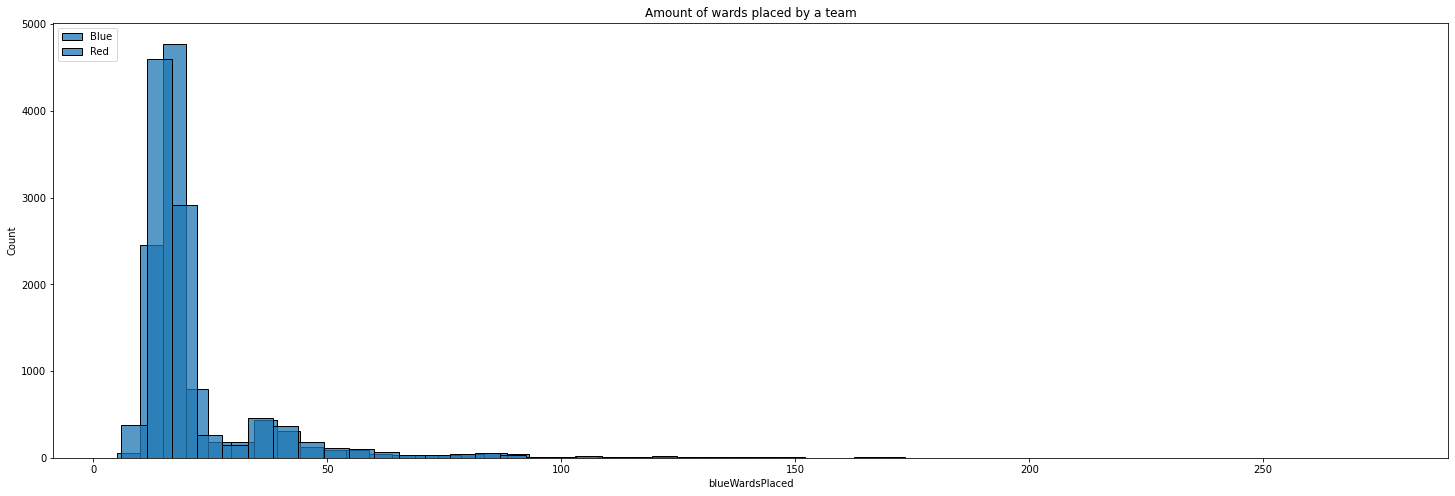

In [28]:
fig, ax = plt.subplots(figsize=(25,8))
sns.histplot(data['blueWardsPlaced'], bins=50, label='Blue')
sns.histplot(data['redWardsPlaced'], bins=50, label='Red')
plt.legend(loc="upper left")
plt.title("Amount of wards placed by a team")
plt.show()

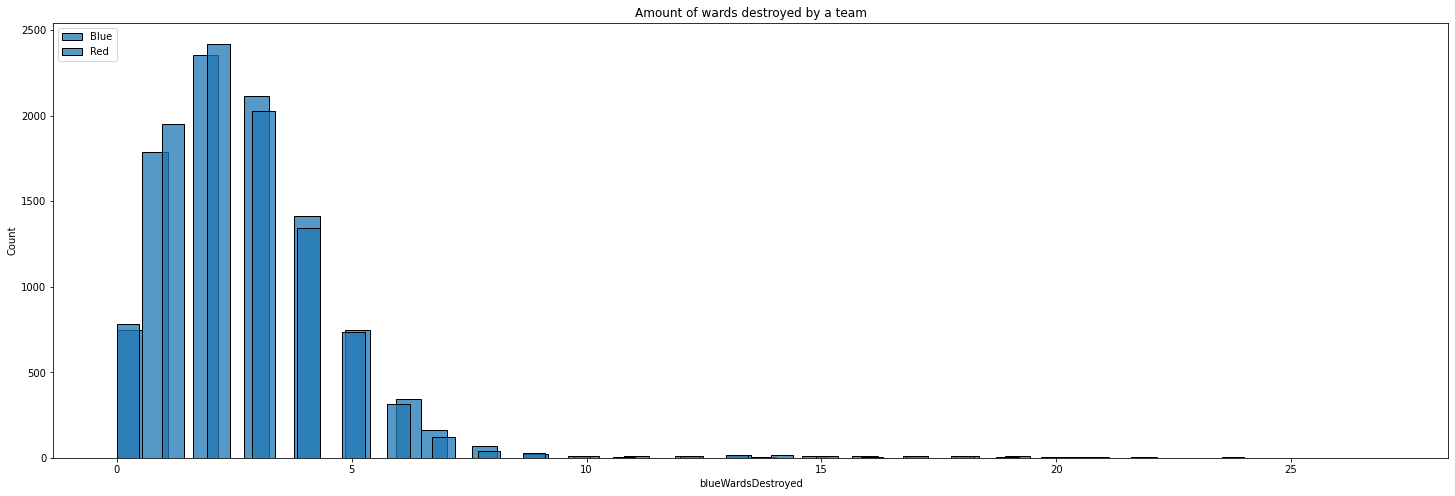

In [29]:
fig, ax = plt.subplots(figsize=(25,8))
sns.histplot(data['blueWardsDestroyed'], bins=50, label='Blue')
sns.histplot(data['redWardsDestroyed'], bins=50, label='Red')
plt.legend(loc="upper left")
plt.title("Amount of wards destroyed by a team")
plt.show()

In [30]:
print(f"Wins:\n{blueVictories['blueFirstBlood'].value_counts(normalize=True)}")
print(f"Wins:\n{blueLosses['blueFirstBlood'].value_counts(normalize=True).sort_values()}")

Wins:
1    0.605882
0    0.394118
Name: blueFirstBlood, dtype: float64
Wins:
1    0.404122
0    0.595878
Name: blueFirstBlood, dtype: float64


There are 2 main objectives before 10th minute in LoL. Dragon and Herald - each spawns only once before minute 10, each is on the other map side.

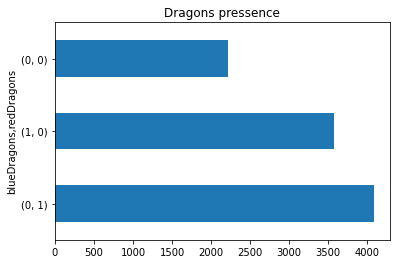

In [31]:
data[['blueDragons', 'redDragons']].value_counts().plot(kind='barh')
plt.title("Dragons pressence")
plt.show()

Red side takes the first dragon more often, because of the map design

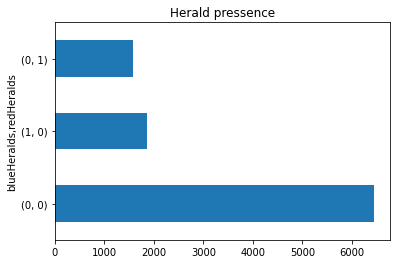

In [33]:
data[['blueHeralds', 'redHeralds']].value_counts().plot(kind='barh')
plt.title("Herald pressence")
plt.show()

In [34]:
print(f"In winning games, blue took dragon {round(100*blueVictories['blueDragons'].value_counts(normalize=True)[1], 2)}% of the time")
print(f"In losing, the dragon was taken only in {round(100*blueLosses['blueDragons'].value_counts(normalize=True)[1], 2)}% of the cases")

print(f"\nIf blue team ended up winning, herald was taken {round(100*blueVictories['blueHeralds'].value_counts(normalize=True)[1],2)}% of the time by them, while it was only {round(100*blueLosses['blueHeralds'].value_counts(normalize=True)[1], 2)}% if losing.")

In winning games, blue took dragon 46.49% of the time
In losing, the dragon was taken only in 25.94% of the cases

If blue time ended up winning, herald was taken 22.41% of the time by them, while it was only 15.19% if losing.


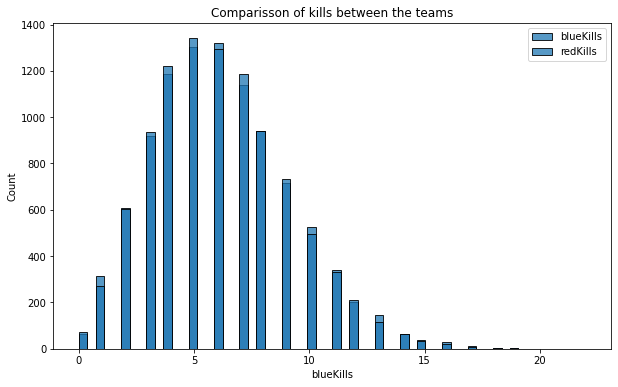

In [35]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data.blueKills, label='blueKills')
sns.histplot(data.blueDeaths, label='redKills')  # blue deaths == red kills
plt.legend(loc="upper right")
plt.title('Comparisson of kills between the teams')
plt.show()

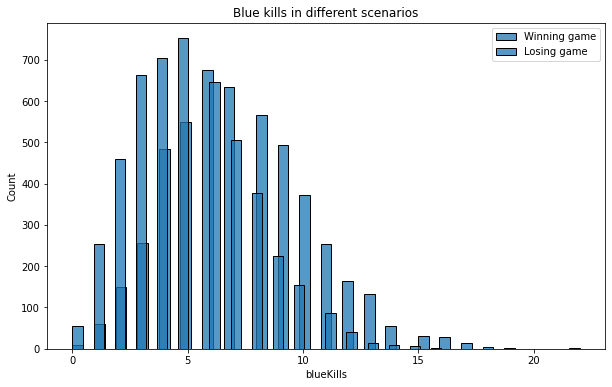

In [36]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(blueVictories.blueKills, label='Winning game')
sns.histplot(blueLosses.blueKills, label='Losing game')  
plt.legend(loc="upper right")
plt.title('Blue kills in different scenarios')
plt.show()

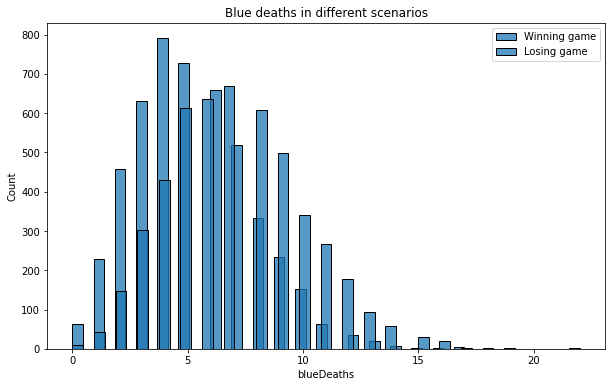

In [37]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(blueVictories.blueDeaths, label='Winning game')
sns.histplot(blueLosses.blueDeaths, label='Losing game')  
plt.legend(loc="upper right")
plt.title('Blue deaths in different scenarios')
plt.show()

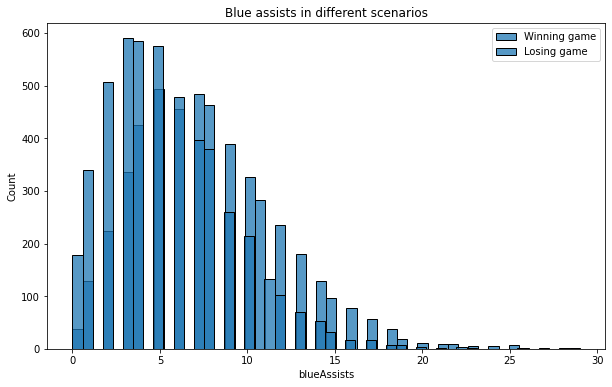

In [38]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(blueVictories.blueAssists, label='Winning game')
sns.histplot(blueLosses.blueAssists, label='Losing game')  
plt.legend(loc="upper right")
plt.title('Blue assists in different scenarios')
plt.show()

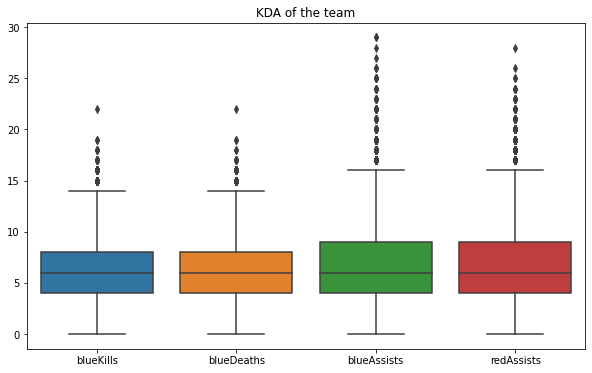

In [40]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=data[['blueKills', 'blueDeaths', 'blueAssists', 'redAssists']])
plt.title("KDA of the team")
plt.show()

In [41]:
print(data[['blueDragons', 'blueHeralds', 'blueEliteMonsters']].value_counts())

blueDragons  blueHeralds  blueEliteMonsters
0            0            0                    5156
1            0            1                    2866
0            1            1                    1147
1            1            2                     710
dtype: int64


EliteMonsters is just a sum of Dragons and Heralds killed, we would prefer to keep this data separated.

In [42]:
data.drop(columns={'blueEliteMonsters', 'redEliteMonsters'}, inplace=True)

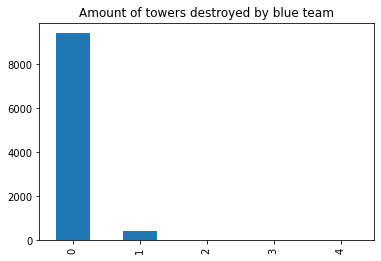

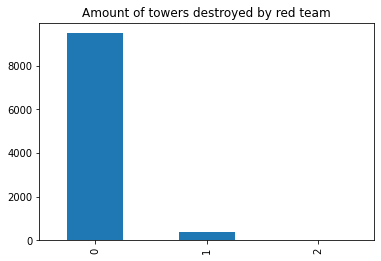

In [43]:
data.blueTowersDestroyed.value_counts().plot(kind='bar')
plt.title('Amount of towers destroyed by blue team')
plt.show()

data.redTowersDestroyed.value_counts().plot(kind='bar')
plt.title('Amount of towers destroyed by red team')
plt.show()

In [44]:
print(blueVictories.blueTowersDestroyed.value_counts())
print(blueLosses.blueTowersDestroyed.value_counts())

0    4580
1     316
2      26
3       7
4       1
Name: blueTowersDestroyed, dtype: int64
0    4835
1     113
2       1
Name: blueTowersDestroyed, dtype: int64


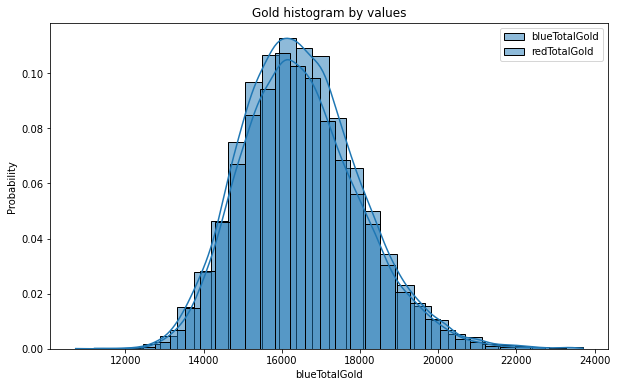

In [45]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data['blueTotalGold'], bins=30, label='blueTotalGold', kde=True, stat='probability')
sns.histplot(data['redTotalGold'], bins=30, label='redTotalGold', kde=True, stat='probability')
plt.legend(loc="upper right")
plt.title('Gold histogram by values')
plt.show()

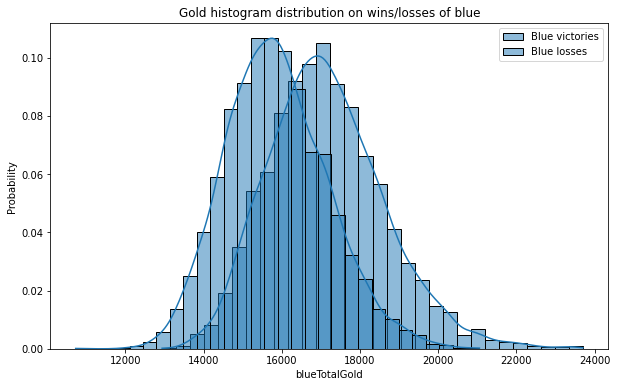

In [46]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(blueVictories['blueTotalGold'], bins=30, label='Blue victories', kde=True, stat='probability')
sns.histplot(blueLosses['blueTotalGold'], bins=30, label='Blue losses', kde=True, stat='probability')
plt.legend(loc="upper right")
plt.title('Gold histogram distribution on wins/losses of blue')
plt.show()

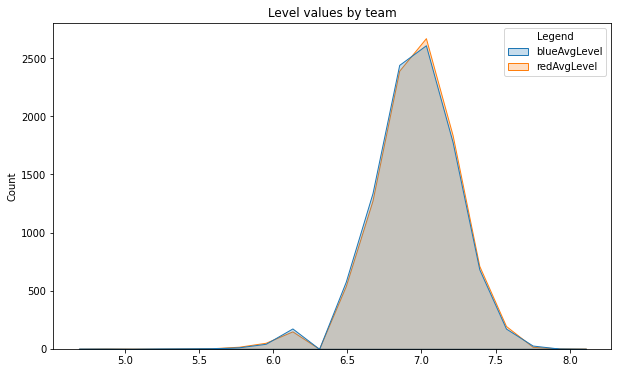

In [47]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data[['blueAvgLevel', 'redAvgLevel']], bins=20, hue_order=['blueAvgLevel', 'redAvgLevel'],element='poly', ax=ax)
legend = ax.get_legend()
handles = legend.legendHandles
legend.remove()
ax.legend(handles, ['blueAvgLevel', 'redAvgLevel'], title='Legend')
plt.title('Level values by team')
plt.show()

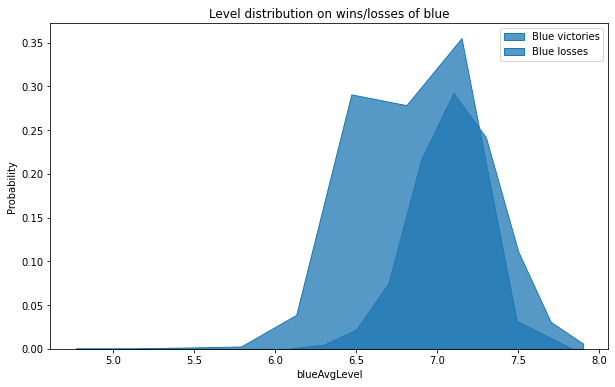

In [48]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(blueVictories['blueAvgLevel'], bins=10, label='Blue victories', element='poly',stat='probability')
sns.histplot(blueLosses['blueAvgLevel'], bins=10, label='Blue losses', element='poly', stat='probability')
plt.legend(loc="upper right")
plt.title('Level distribution on wins/losses of blue')
plt.show()

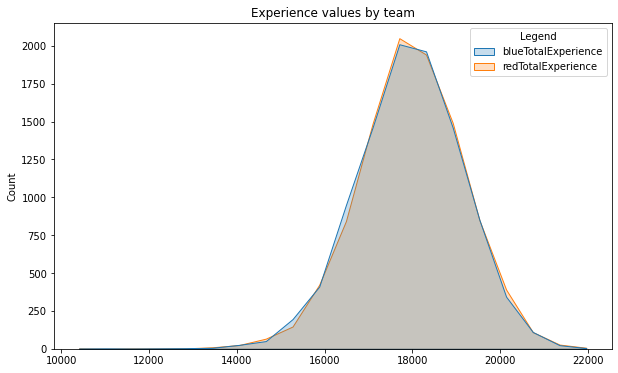

In [49]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data[['blueTotalExperience', 'redTotalExperience']], bins=20, hue_order=['blueTotalExperience', 'redTotalExperience'],element='poly', ax=ax)
legend = ax.get_legend()
handles = legend.legendHandles
legend.remove()
ax.legend(handles, ['blueTotalExperience', 'redTotalExperience'], title='Legend')
plt.title('Experience values by team')
plt.show()

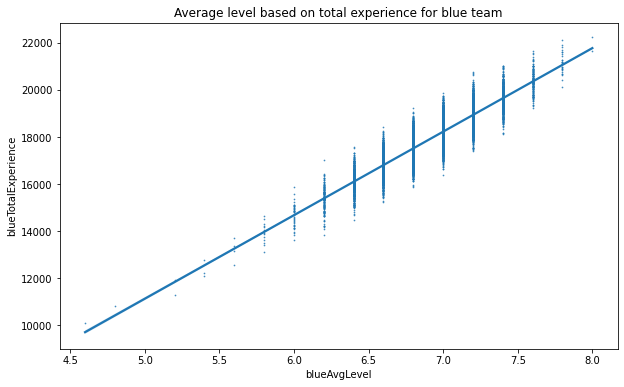

In [50]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.regplot(x=data['blueAvgLevel'], y=data['blueTotalExperience'], scatter_kws={'s':0.5})
plt.title('Average level based on total experience for blue team')
plt.show()

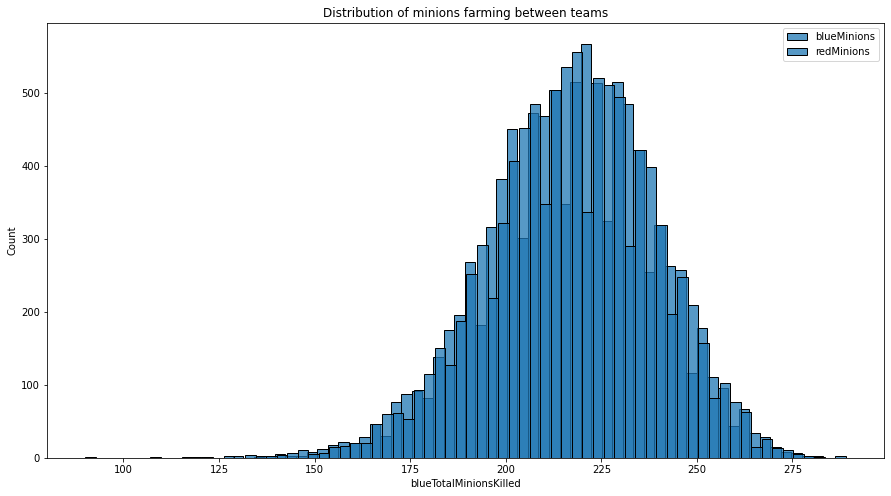

In [51]:
fig, ax = plt.subplots(figsize=(15,8))
sns.histplot(data['blueTotalMinionsKilled'], label='blueMinions')
sns.histplot(data['redTotalMinionsKilled'], label='redMinions')
plt.title('Distribution of minions farming between teams')
plt.legend(loc="upper right")
plt.show()

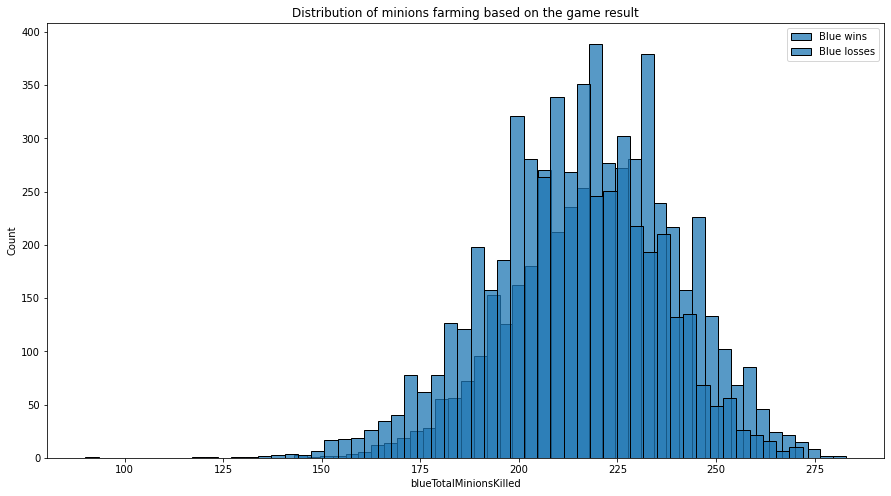

In [52]:
fig, ax = plt.subplots(figsize=(15,8))
sns.histplot(blueVictories['blueTotalMinionsKilled'], label='Blue wins')
sns.histplot(blueLosses['blueTotalMinionsKilled'], label='Blue losses')
plt.title('Distribution of minions farming based on the game result')
plt.legend(loc="upper right")
plt.show()

It is kinda difficult to assign jungle monsters farming to winning a game, since jungler can also help their lanes and get gold that way.

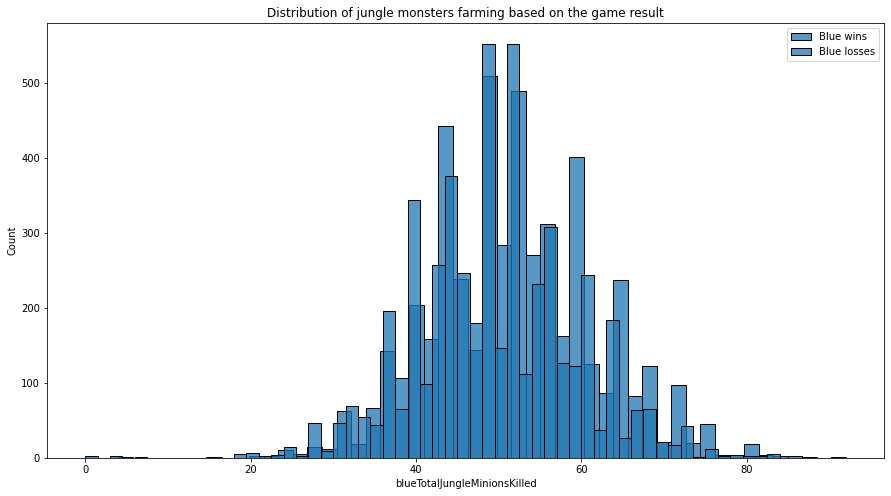

In [53]:
fig, ax = plt.subplots(figsize=(15,8))
sns.histplot(blueVictories['blueTotalJungleMinionsKilled'], label='Blue wins')
sns.histplot(blueLosses['blueTotalJungleMinionsKilled'], label='Blue losses')
plt.title('Distribution of jungle monsters farming based on the game result')
plt.legend(loc="upper right")
plt.show()

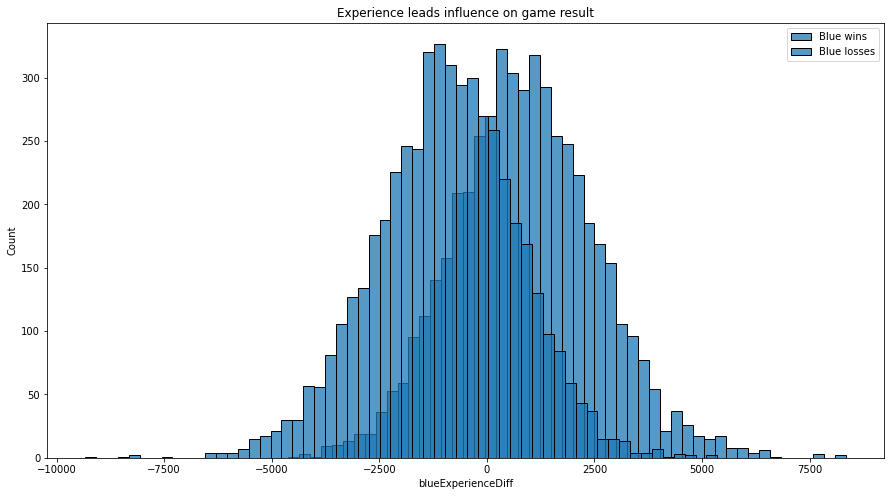

In [54]:
fig, ax = plt.subplots(figsize=(15,8))
sns.histplot(blueVictories['blueExperienceDiff'], label='Blue wins')
sns.histplot(blueLosses['blueExperienceDiff'], label='Blue losses')
plt.title('Experience leads influence on game result')
plt.legend(loc="upper right")
plt.show()

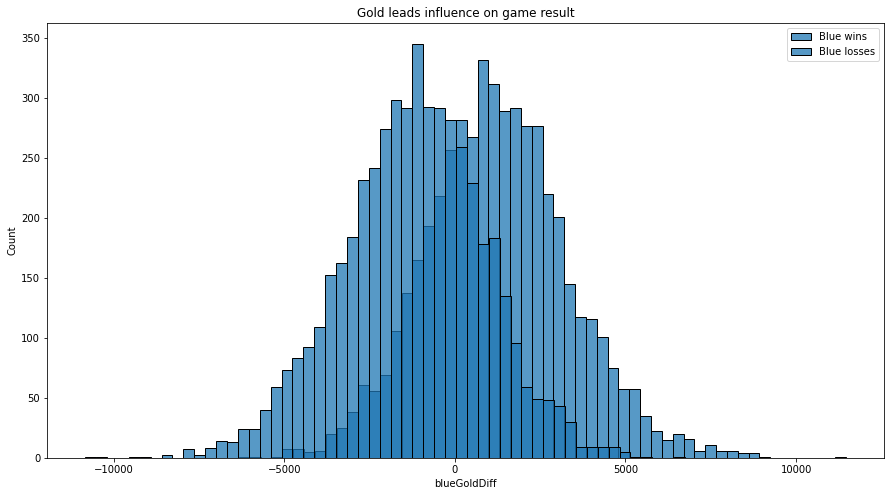

In [55]:
fig, ax = plt.subplots(figsize=(15,8))
sns.histplot(blueVictories['blueGoldDiff'], label='Blue wins')
sns.histplot(blueLosses['blueGoldDiff'], label='Blue losses')
plt.title('Gold leads influence on game result')
plt.legend(loc="upper right")
plt.show()

## Data preprocessing

## Feature selection

### Outliers

In this part we want to delete outliers, as those might negatively influenece machine learning algorithm. That is why we want to delete at least the first iteration of outliers.
There is ~5% values as outliers in the first iteration, which, we consider, is reasonable price to pay for cleaner andoutlier detection more useful data.\
We are considering values further than 3x standard deviations from the mean as outliers in our preprocessing.

In [56]:
data.shape

(9879, 29)

In [57]:
def number_of_corr_values(df, corr_threshold:int = 0.1) -> pd.DataFrame:
    # Function ranking correlation strenght between columns and blue team victories
        
    # Calculate correlation for all columns and sort by strength
    correlation = df.loc[:, df.columns != 'gameId'].corr()
    correlation_sorted = correlation.sort_values(['blueWins'], key=abs ,ascending=False)  
        
    new_index_order = ['gameId']   # always keep id 
        
    # Iterate through sorted corelation array as long as correlation is stronger than corr_threshold,
    # add those columns to array of columns to keep
    for cor in range(len(correlation_sorted['blueWins'])):
        if abs(correlation_sorted['blueWins'][cor]) < corr_threshold:
            break
        new_index_order.append(correlation_sorted['blueWins'].index[cor])
        
    # Create and return new dataframe
    new_set = df[new_index_order]
    return new_set

In [58]:
def feature_selection(df, cols:int = 16):
    # Function that returns columns recommended by filter methods
    # Uses mutual and f_regression to calculate important columns and rank them
    X_new = df.loc[:, df.columns != 'gameId']  # we are not evaluating id column
        
    # Create selectors with given type of calculation and number of output columns (cols)
    selector_mutual = SelectKBest(mutual_info_regression, k=cols)
    selector_fregresion = SelectKBest(f_regression, k=cols)

    # Fit transforms for methods - with dropna if user didn't use any NaN deletion technique 
    result_mutual = selector_mutual.fit_transform(X_new.dropna(), X_new.dropna()['blueWins'])
    result_fregresion = selector_fregresion.fit_transform(X_new.dropna(), X_new.dropna()['blueWins'])

    # Select recommended column names from results 
    chosen_names_mutual = np.append(selector_mutual.get_support(), True)
    chosen_names_fregresion = np.append(selector_fregresion.get_support(), True)
            
    # Create list of column names with unique values (mutual OR fregresion)
    values = (list(df.columns[chosen_names_mutual]))
    values_second = (list(df.columns[chosen_names_fregresion]))
    values += [item for item in values_second if item not in values]
        
    # Return dataframe containing reduced amount of columns (+id)
    return df[values]

In [59]:
data = number_of_corr_values(data)
data = feature_selection(data)

In [60]:
# Function to detect and delete outliers
def delete_outliers(df : pd.DataFrame) -> pd.DataFrame:
    """
    Function deletes rows containing outlier value in any of the columns and returns adjusted dataframe
    Args
        df - dataframe containing columns to check for outliers
    Returns
        DataFrame without outlier values
    """
    for cols in df.columns:    
        # Check for each column in the dataframe    
        data_frame = df[cols]
        data_mean, data_std = np.mean(data_frame), np.std(data_frame)  # Outlier > mean+3*std OR outlier < mean-3*std

        # Outliers percentage definition
        cut_off = data_std * 3
        lower, upper = data_mean - cut_off, data_mean + cut_off 

        # Identify and remove outliers
        outliers = [False if x < lower or x > upper else True for x in data_frame] 
            
        # Information for the user about deleting rows based on given column
        if outliers.count(False) > 0:
            print(f'Identified outliers: {outliers.count(False)} in column: {cols}')
        df = df[outliers]

    return df

We need to delete outliers to clear our data a bit more and also to prepare data for normalisation better

In [61]:
# Selected columns to outlier check
check_outliers_columns = ['blueWardsPlaced', 'blueWardsDestroyed',
       'blueKills', 'blueDeaths', 'blueAssists', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'redWardsPlaced', 'redWardsDestroyed', 'redAssists','redTotalGold',
       'redAvgLevel', 'redTotalExperience', 'redTotalMinionsKilled',
       'redTotalJungleMinionsKilled']

In [62]:
print(data.shape)

(9879, 18)


In [63]:
for col in check_outliers_columns:
    try:
        data[col] = delete_outliers(data[[col]])
        data.dropna(inplace=True)
    except KeyError:
        pass

Identified outliers: 50 in column: blueKills
Identified outliers: 65 in column: blueDeaths
Identified outliers: 69 in column: blueAssists
Identified outliers: 41 in column: blueTotalGold
Identified outliers: 60 in column: blueAvgLevel
Identified outliers: 17 in column: blueTotalExperience
Identified outliers: 24 in column: blueTotalMinionsKilled
Identified outliers: 16 in column: blueGoldDiff
Identified outliers: 20 in column: blueExperienceDiff
Identified outliers: 64 in column: redAssists
Identified outliers: 20 in column: redTotalGold
Identified outliers: 60 in column: redAvgLevel
Identified outliers: 11 in column: redTotalExperience
Identified outliers: 25 in column: redTotalMinionsKilled


In [64]:
print(data.shape)

(9337, 18)


In [65]:
#sns.pairplot(data, hue='blueWins')
#plt.show()

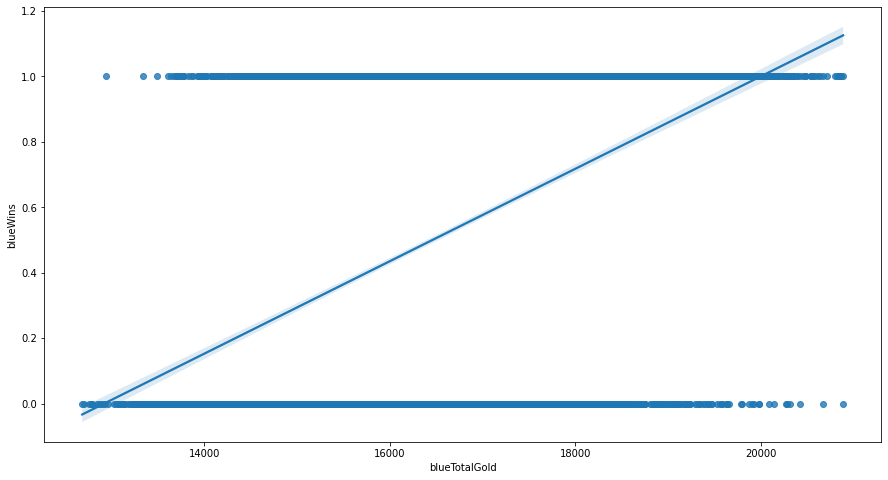

In [66]:
fig, ax = plt.subplots(figsize=(15,8))
sns.regplot(x=data['blueTotalGold'], y=data['blueWins'])
plt.show()

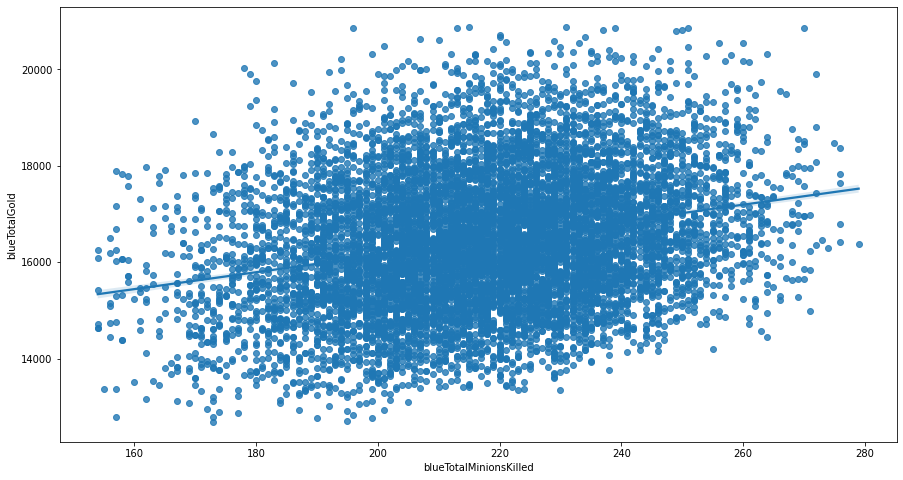

In [67]:
fig, ax = plt.subplots(figsize=(15,8))
sns.regplot(x=data['blueTotalMinionsKilled'], y=data['blueTotalGold'])
plt.show()

In [68]:
data

,gameId,blueWins,blueGoldDiff,blueExperienceDiff,blueTotalGold,redTotalGold,blueTotalExperience,redTotalExperience,blueAvgLevel,redAvgLevel,blueDeaths,blueKills,blueAssists,redAssists,blueDragons,redTotalMinionsKilled,redTowersDestroyed,blueTotalMinionsKilled
0,4519157822,0,643.0,-8.0,17210.0,16567.0,17039.0,17047.0,6.6,6.8,6.0,9.0,11.0,8.0,0,197.0,0,195.0
1,4523371949,0,-2908.0,-1173.0,14712.0,17620.0,16265.0,17438.0,6.6,6.8,5.0,5.0,5.0,2.0,0,240.0,1,174.0
2,4521474530,0,-1172.0,-1033.0,16113.0,17285.0,16221.0,17254.0,6.4,6.8,11.0,7.0,4.0,14.0,1,203.0,0,186.0
3,4524384067,0,-1321.0,-7.0,15157.0,16478.0,17954.0,17961.0,7.0,7.0,5.0,4.0,5.0,10.0,0,235.0,0,201.0
4,4436033771,0,-1004.0,230.0,16400.0,17404.0,18543.0,18313.0,7.0,7.0,6.0,6.0,6.0,7.0,0,225.0,0,210.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,2519.0,2469.0,17765.0,15246.0,18967.0,16498.0,7.2,6.8,4.0,7.0,5.0,7.0,1,229.0,0,211.0
9875,4527797466,1,782.0,888.0,16238.0,15456.0,19255.0,18367.0,7.2,7.0,4.0,6.0,8.0,3.0,1,206.0,0,233.0
9876,4527713716,0,-2416.0,-1877.0,15903.0,18319.0,18032.0,19909.0,7.0,7.4,7.0,6.0,5.0,11.0,0,261.0,0,210.0
9877,4527628313,0,-839.0,-1085.0,14459.0,15298.0,17229.0,18314.0,6.6,7.2,3.0,2.0,3.0,1.0,1,247.0,0,224.0


In [69]:
def data_scale(df):    
    scaled_columns =  list(df.columns)
    scaled_columns.remove('gameId')  # We don't want to scale gameId
        
    # Scaling with the usage of MinMaxScaler - scale all values to <0,1> range
    scaler = preprocessing.MinMaxScaler()
    scaled = scaler.fit_transform(df[scaled_columns])
    scaled = pd.DataFrame(scaled, columns = scaled_columns)
        
    scaled['gameId'] = list(df['gameId'])   # Add id to new dataframe
    return scaled

In [70]:
data = data_scale(data)

In [71]:
data.corr()

,blueWins,blueGoldDiff,blueExperienceDiff,blueTotalGold,redTotalGold,blueTotalExperience,redTotalExperience,blueAvgLevel,redAvgLevel,blueDeaths,blueKills,blueAssists,redAssists,blueDragons,redTotalMinionsKilled,redTowersDestroyed,blueTotalMinionsKilled,gameId
blueWins,1.000000,0.496635,0.472915,0.398031,-0.394149,0.376197,-0.369650,0.336001,-0.331155,-0.322026,0.319507,0.262300,-0.255662,0.203854,-0.190017,-0.085383,0.199526,0.002543
blueGoldDiff,0.496635,1.000000,0.876801,0.803388,-0.791659,0.697143,-0.685688,0.624848,-0.614485,-0.623510,0.637652,0.532982,-0.513557,0.219085,-0.418770,-0.240898,0.416614,-0.016254
blueExperienceDiff,0.472915,0.876801,1.000000,0.703501,-0.695061,0.791039,-0.786134,0.698305,-0.693488,-0.551771,0.562605,0.410235,-0.395873,0.194453,-0.400884,-0.162240,0.405613,-0.013030
blueTotalGold,0.398031,0.803388,0.703501,1.000000,-0.272208,0.665617,-0.442805,0.599037,-0.395467,-0.125841,0.881085,0.734423,-0.105579,0.173795,-0.413538,-0.092114,0.259062,-0.034413
redTotalGold,-0.394149,-0.791659,-0.695061,-0.272208,1.000000,-0.443610,0.653714,-0.395097,0.587222,0.878455,-0.126395,-0.107734,0.721563,-0.175715,0.252412,0.294771,-0.407427,-0.009043
blueTotalExperience,0.376197,0.697143,0.791039,0.665617,-0.443610,1.000000,-0.243758,0.885761,-0.213711,-0.422445,0.459785,0.283011,-0.364114,0.164253,-0.114186,-0.144622,0.532420,-0.039725
redTotalExperience,-0.369650,-0.685688,-0.786134,-0.442805,0.653714,-0.243758,1.000000,-0.212159,0.883482,0.447937,-0.427389,-0.364428,0.259722,-0.142326,0.520164,0.111092,-0.105126,-0.019477
blueAvgLevel,0.336001,0.624848,0.698305,0.599037,-0.395097,0.885761,-0.212159,1.000000,-0.189147,-0.373880,0.419857,0.272327,-0.329986,0.145285,-0.097720,-0.134912,0.462357,-0.038625
redAvgLevel,-0.331155,-0.614485,-0.693488,-0.395467,0.587222,-0.213711,0.883482,-0.189147,1.000000,0.410759,-0.374989,-0.324922,0.254670,-0.132814,0.442272,0.092614,-0.103068,-0.008754
blueDeaths,-0.322026,-0.623510,-0.551771,-0.125841,0.878455,-0.422445,0.447937,-0.373880,0.410759,1.000000,0.035582,-0.007951,0.789859,-0.175082,-0.073191,0.123596,-0.433231,-0.009958


In [72]:
data.corr().abs()["blueWins"].sort_values(ascending=False)

blueWins                  1.000000
blueGoldDiff              0.496635
blueExperienceDiff        0.472915
blueTotalGold             0.398031
redTotalGold              0.394149
blueTotalExperience       0.376197
redTotalExperience        0.369650
blueAvgLevel              0.336001
redAvgLevel               0.331155
blueDeaths                0.322026
blueKills                 0.319507
blueAssists               0.262300
redAssists                0.255662
blueDragons               0.203854
blueTotalMinionsKilled    0.199526
redTotalMinionsKilled     0.190017
redTowersDestroyed        0.085383
gameId                    0.002543
Name: blueWins, dtype: float64

In [73]:
data.to_csv(SAVE_TO, index=False)